# Question-1

In [6]:
import numpy as np
if not hasattr(np, "bool8"): 
    np.bool8 = np.bool_
    
import gym
import numpy as np
import random
from collections import deque

# Create the environment
env = gym.make("CartPole-v1")

# Discretize continuous state space into buckets
def discretize_state(state):
    """Converts continuous state to discrete state"""
    # Define number of buckets per observation dimension
    bins = [
        np.linspace(-4.8, 4.8, 20),       # Cart position
        np.linspace(-4, 4, 20),           # Cart velocity
        np.linspace(-0.418, 0.418, 20),   # Pole angle
        np.linspace(-4, 4, 20)            # Pole velocity
    ]
    state_discrete = tuple(
        int(np.digitize(s, b) - 1) for s, b in zip(state, bins)
    )
    return state_discrete

# Initialize Q-table
num_buckets = (20, 20, 20, 20)
num_actions = env.action_space.n
Q_table = np.zeros(num_buckets + (num_actions,))

# Hyperparameters
alpha = 0.1       # Learning rate
gamma = 0.99      # Discount factor
epsilon = 1.0     # Exploration rate
epsilon_min = 0.01
epsilon_decay = 0.995
episodes = 1000
max_steps = 200

# For plotting results
rewards_list = []

# Training loop
for episode in range(episodes):
    state = discretize_state(env.reset()[0])
    total_reward = 0

    for step in range(max_steps):
        # Choose action using ε-greedy policy
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q_table[state])

        # Perform action
        next_state_raw, reward, done, _, _ = env.step(action)
        next_state = discretize_state(next_state_raw)

        # Update Q-value using Bellman equation
        old_value = Q_table[state + (action,)]
        next_max = np.max(Q_table[next_state])
        new_value = old_value + alpha * (reward + gamma * next_max - old_value)
        Q_table[state + (action,)] = new_value

        state = next_state
        total_reward += reward

        if done:
            break

    # Decay epsilon
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay

    rewards_list.append(total_reward)

    # Print progress
    if (episode + 1) % 100 == 0:
        avg_reward = np.mean(rewards_list[-100:])
        print(f"Episode: {episode+1}, Average Reward: {avg_reward:.2f}, Epsilon: {epsilon:.3f}")


print("\nTesting the trained agent...\n")
test_episodes = 10
for ep in range(test_episodes):
    state = discretize_state(env.reset()[0])
    total_reward = 0
    for step in range(max_steps):
        action = np.argmax(Q_table[state])
        next_state_raw, reward, done, _, _ = env.step(action)
        next_state = discretize_state(next_state_raw)
        state = next_state
        total_reward += reward
        if done:
            break
    print(f"Test Episode {ep+1}: Total Reward = {total_reward}")

env.close()


Episode: 100, Average Reward: 24.76, Epsilon: 0.606
Episode: 200, Average Reward: 30.67, Epsilon: 0.367
Episode: 300, Average Reward: 33.92, Epsilon: 0.222
Episode: 400, Average Reward: 33.76, Epsilon: 0.135
Episode: 500, Average Reward: 36.59, Epsilon: 0.082
Episode: 600, Average Reward: 38.51, Epsilon: 0.049
Episode: 700, Average Reward: 39.55, Epsilon: 0.030
Episode: 800, Average Reward: 40.04, Epsilon: 0.018
Episode: 900, Average Reward: 47.67, Epsilon: 0.011
Episode: 1000, Average Reward: 50.51, Epsilon: 0.010

Testing the trained agent...

Test Episode 1: Total Reward = 42.0
Test Episode 2: Total Reward = 48.0
Test Episode 3: Total Reward = 68.0
Test Episode 4: Total Reward = 38.0
Test Episode 5: Total Reward = 46.0
Test Episode 6: Total Reward = 49.0
Test Episode 7: Total Reward = 62.0
Test Episode 8: Total Reward = 46.0
Test Episode 9: Total Reward = 45.0
Test Episode 10: Total Reward = 73.0


# Question-2

Episode: 100, Average Reward: -200.00, Epsilon: 0.606
Episode: 200, Average Reward: -200.00, Epsilon: 0.367
Episode: 300, Average Reward: -200.00, Epsilon: 0.222
Episode: 400, Average Reward: -200.00, Epsilon: 0.135
Episode: 500, Average Reward: -200.00, Epsilon: 0.082
Episode: 600, Average Reward: -200.00, Epsilon: 0.049
Episode: 700, Average Reward: -200.00, Epsilon: 0.030
Episode: 800, Average Reward: -200.00, Epsilon: 0.018
Episode: 900, Average Reward: -200.00, Epsilon: 0.011
Episode: 1000, Average Reward: -200.00, Epsilon: 0.010
Episode: 1100, Average Reward: -200.00, Epsilon: 0.010
Episode: 1200, Average Reward: -200.00, Epsilon: 0.010
Episode: 1300, Average Reward: -200.00, Epsilon: 0.010
Episode: 1400, Average Reward: -200.00, Epsilon: 0.010
Episode: 1500, Average Reward: -200.00, Epsilon: 0.010
Episode: 1600, Average Reward: -200.00, Epsilon: 0.010
Episode: 1700, Average Reward: -199.76, Epsilon: 0.010
Episode: 1800, Average Reward: -199.44, Epsilon: 0.010
Episode: 1900, Aver

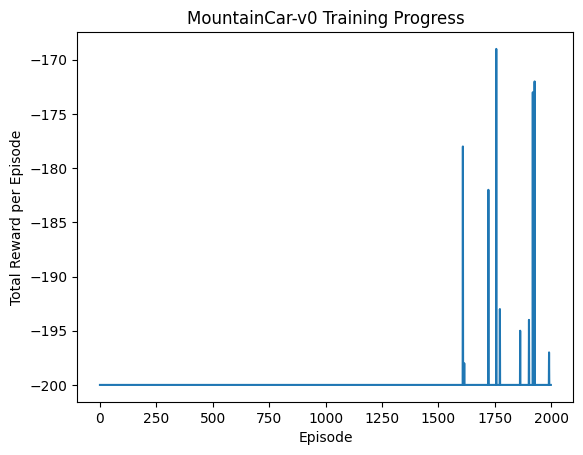

In [7]:
import numpy as np
if not hasattr(np, "bool8"):  
    np.bool8 = np.bool_

import gym
import random
import matplotlib.pyplot as plt

# Create the environment
env = gym.make("MountainCar-v0")

# Discretize continuous state space
NUM_BINS = 40  # Number of bins per dimension
state_bins = [
    np.linspace(env.observation_space.low[0], env.observation_space.high[0], NUM_BINS),
    np.linspace(env.observation_space.low[1], env.observation_space.high[1], NUM_BINS)
]

def discretize_state(state):
    """Convert continuous state into a discrete tuple index"""
    indices = []
    for i in range(len(state)):
        index = np.digitize(state[i], state_bins[i]) - 1
        index = np.clip(index, 0, NUM_BINS - 1)
        indices.append(index)
    return tuple(indices)

# Initialize Q-table
num_actions = env.action_space.n
Q_table = np.zeros((NUM_BINS, NUM_BINS, num_actions))

# Hyperparameters
alpha = 0.1          # Learning rate
gamma = 0.99         # Discount factor
epsilon = 1.0        # Exploration rate
epsilon_min = 0.01
epsilon_decay = 0.995
episodes = 2000
max_steps = 200

# Tracking performance
reward_list = []

# Training loop
for episode in range(episodes):
    state = discretize_state(env.reset()[0])
    total_reward = 0

    for step in range(max_steps):
        # Choose action (ε-greedy)
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q_table[state])

        # Take action
        next_state_raw, reward, done, _, _ = env.step(action)
        next_state = discretize_state(next_state_raw)

        # MountainCar gives -1 reward every step until it reaches the goal
        Q_table[state + (action,)] += alpha * (
            reward + gamma * np.max(Q_table[next_state]) - Q_table[state + (action,)]
        )

        state = next_state
        total_reward += reward

        if done:
            break

    # Decay epsilon
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay

    reward_list.append(total_reward)

    # Progress log
    if (episode + 1) % 100 == 0:
        avg_reward = np.mean(reward_list[-100:])
        print(f"Episode: {episode+1}, Average Reward: {avg_reward:.2f}, Epsilon: {epsilon:.3f}")


print("\nTesting trained agent...\n")
test_episodes = 5
for ep in range(test_episodes):
    state = discretize_state(env.reset()[0])
    total_reward = 0
    for step in range(max_steps):
        action = np.argmax(Q_table[state])
        next_state_raw, reward, done, _, _ = env.step(action)
        next_state = discretize_state(next_state_raw)
        total_reward += reward
        state = next_state
        if done:
            break
    print(f"Test Episode {ep+1}: Total Reward = {total_reward}")

env.close()


plt.plot(reward_list)
plt.xlabel("Episode")
plt.ylabel("Total Reward per Episode")
plt.title("MountainCar-v0 Training Progress")
plt.show()
